In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fontTools.mtiLib import parseMarkToLigature
from sklearn.model_selection import train_test_split



In [139]:
data = pd.read_csv('IRIS.csv')
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [140]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [141]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [142]:
data.shape[0]

150

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


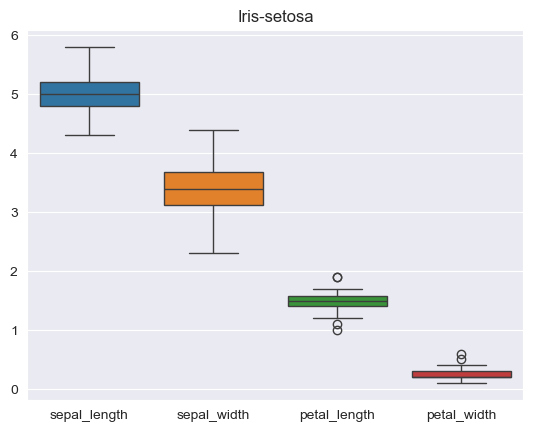

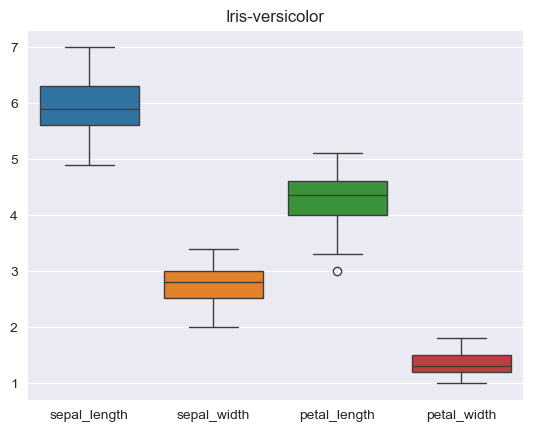

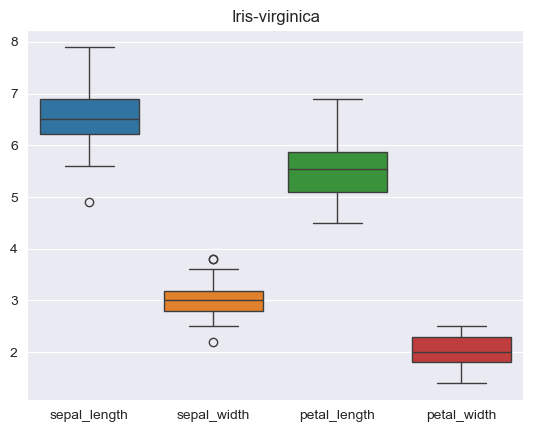

In [143]:
class_counts = data['species'].unique()

print(class_counts)

for i in class_counts:
    plt.title(i)
    sns.boxplot(data=data[data['species'] == i])
    plt.show()



In [144]:
from scipy import stats


cleaned_data = []

for i in class_counts:
    df = data[data['species'] == i]
    num_cols = df.select_dtypes(include=[np.number]).columns
    z_score = np.abs(stats.zscore(df[num_cols]))
    mask = (z_score < 2).all(axis=1)
    
    print(f"Outliers for {i}: {df.shape[0] - mask.sum()}")
    
    cleaned_data.append(df[mask])


Outliers for Iris-setosa: 10
Outliers for Iris-versicolor: 7
Outliers for Iris-virginica: 7


In [145]:
final_df = pd.concat(cleaned_data, ignore_index=True)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


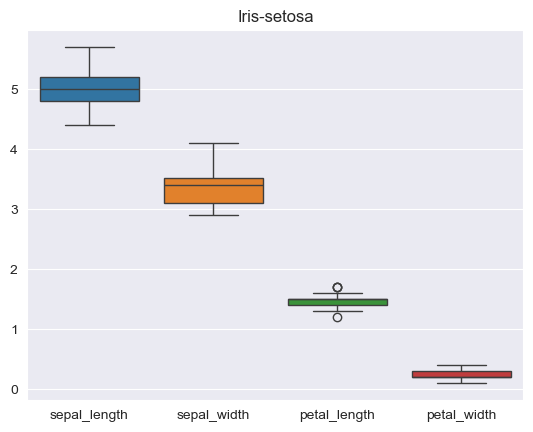

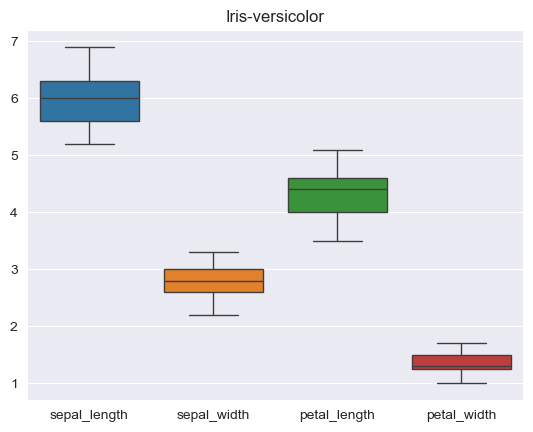

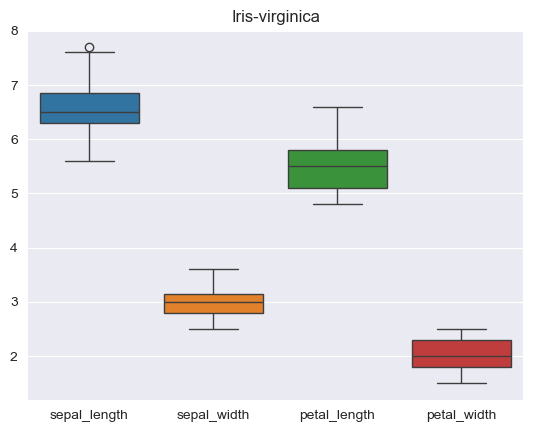

In [146]:
class_counts = data['species'].unique()

print(class_counts)

for i in class_counts:
    plt.title(i)
    sns.boxplot(data=final_df[final_df['species'] == i])
    plt.show()



In [147]:
final_df.shape[0]

126

C:\Users\igors\miniconda3\envs\IRIS\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


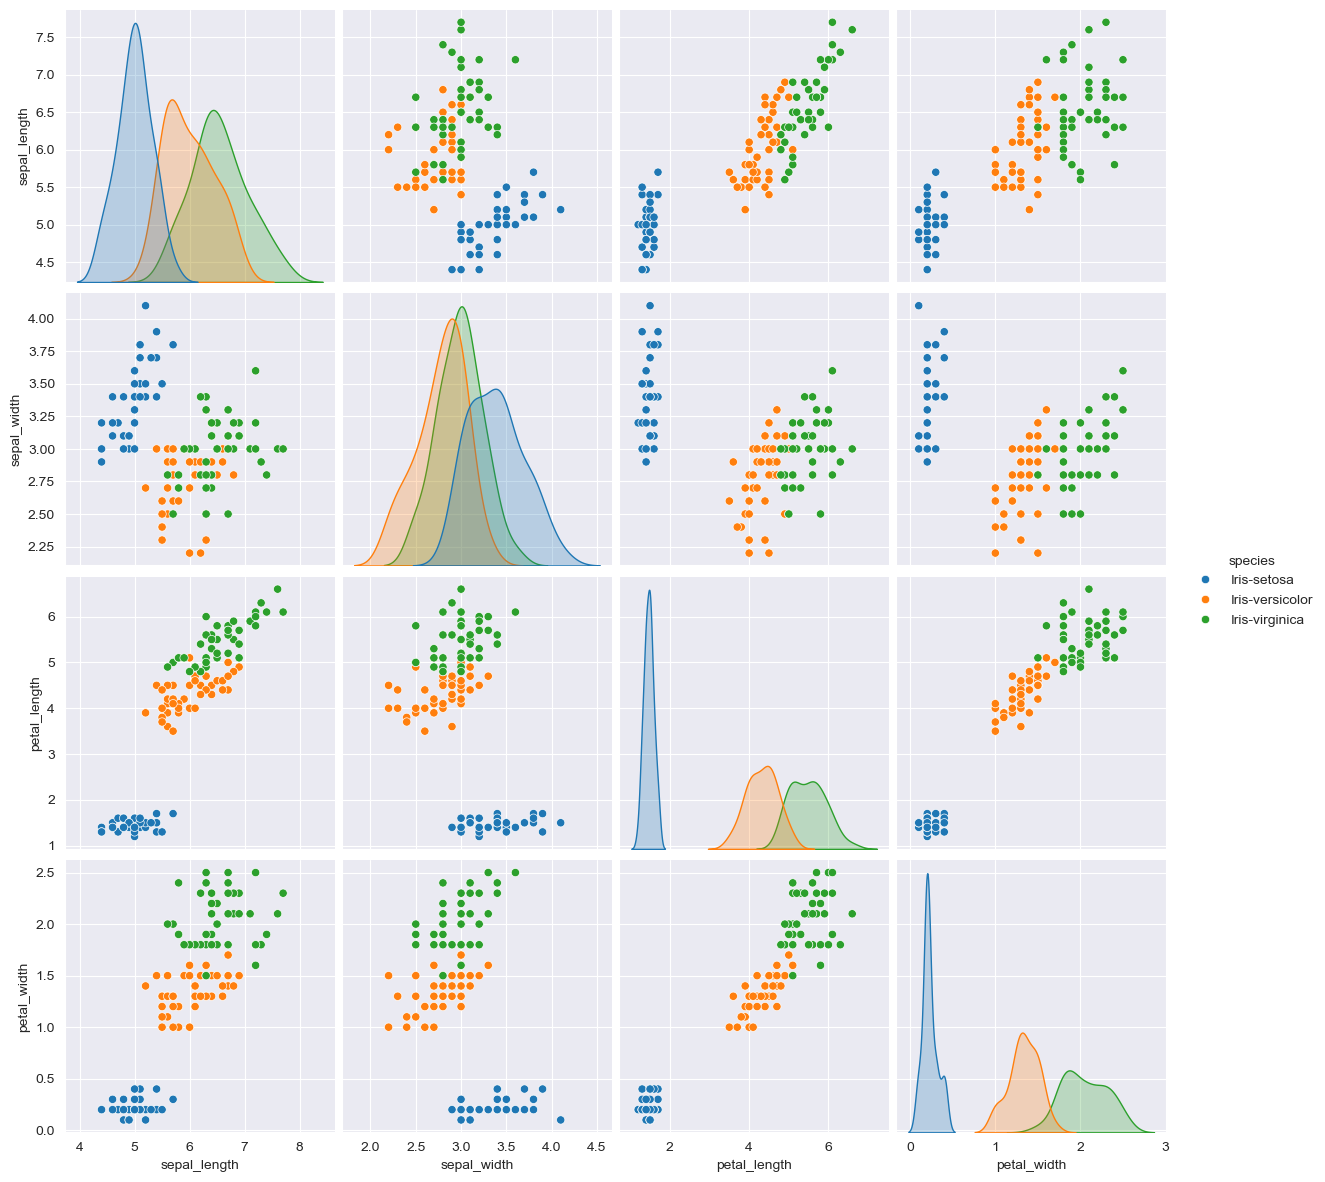

In [148]:
sns.pairplot(final_df, hue='species',size=3)
plt.show()

In [149]:
final_df['species'] = final_df['species'].astype('category')

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  126 non-null    float64 
 1   sepal_width   126 non-null    float64 
 2   petal_length  126 non-null    float64 
 3   petal_width   126 non-null    float64 
 4   species       126 non-null    category
dtypes: category(1), float64(4)
memory usage: 4.3 KB


In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


mask = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
final_df['species'] = final_df['species'].map(mask)


In [151]:

X = final_df.drop('species', axis=1)
y = final_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    print(f" model: {name}")

    cv_scores = cross_val_score(model, X, y, cv=5)


    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f}")
    print(f"Standard deviation: {cv_scores.std():.4f}")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"Accuracy on test set: {acc:.4f}")
    print("Confusion matrix:")
    print(conf_matrix)
    print("Classification report:")
    print(class_report)



🔹 Trenowanie modelu: Logistic Regression
🔹 Cross-validation scores: [1.   1.   0.96 0.92 1.  ]
🔹 Średnia dokładność: 0.9760
🔹 Odchylenie standardowe: 0.0320
✅ Dokładność na zbiorze testowym: 1.0000
📊 Macierz błędów:
[[ 9  0  0]
 [ 0 11  0]
 [ 0  0  6]]
📃 Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26


🔹 Trenowanie modelu: Decision Tree
🔹 Cross-validation scores: [1.   1.   0.96 0.96 1.  ]
🔹 Średnia dokładność: 0.9840
🔹 Odchylenie standardowe: 0.0196
✅ Dokładność na zbiorze testowym: 1.0000
📊 Macierz błędów:
[[ 9  0  0]
 [ 0 11  0]
 [ 0  0  6]]
📃 Raport klasyfikacji:
              precision    recall  f1-score   support

           0    